# Resident time considering time around lights #

<ul>
    <li>Read function</li>
    <li>Plot histogram</li>
    <li>Data fit generic points</li>
    <li>Data fit histogram</li>
</ul>  

In [4]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import glob
import matplotlib.pyplot as plt 

In [5]:
plt.rcParams.update({'font.size' : 16})

In [6]:
#Q= 0.000347/1020   # m^3/s
Q= 2.31/998
V=3.2*2.5*3.0 # be carefull with units 
tau=V/2/Q
print(tau)

5184.415584415585


In [7]:
t=np.linspace (0, 65000,100)

In [8]:
E_t=(1/tau)*np.exp(-t/tau)

In [9]:
teta=t/tau
E_teta=np.exp(-teta)
E_teta_2=teta*np.exp(-teta)

In [54]:
WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4I-R10-025_I-Phyc\04_FLUENT\00_RTD_Lights\00_Baseline\00_1phase-water'
#WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4I-R10-025_I-Phyc\04_FLUENT\Baseline_Geometry'
scenario='1Phase_DPMBubble_DPMAlgae'
scenario='DPM-Loose_coupling'
scenario='DPM-Close_Coupling_Options'
#scenario='04_Eulerian'
#scenario='01_JetAerator'
#baseline='Baseline_Geometry\Baseline'
#file=os.path.join(WorkingDir,scenario,'dpm-residence-time-k_eps-Mom_1st.dpm')
file=os.path.join(WorkingDir,scenario,'dpm-residence-time.dpm')
#file=os.path.join(WorkingDir,scenario,'dpm-residence-time.dpm')
#files=glob.glob(file_path)
#Base_file=os.path.join(WorkingDir,baseline,'RTD-baseline.his')
#files.append(Base_file)
#Base_file_avg=os.path.join(WorkingDir,baseline,'RTD-baseline-100.his')
#files.append(Base_file_avg)

In [55]:
file

'C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\00_RTD_Lights\\00_Baseline\\00_1phase-water\\DPM-Close_Coupling_Options\\dpm-residence-time.dpm'

In [56]:
data_frames=pd.read_csv(file, sep='\t')
Data=pd.DataFrame()
bin=pd.DataFrame()

In [57]:
heads=list(data_frames)

In [58]:
heads

['PARTICLE_ID',
 'PARTICLE_DIAMETER',
 'RESIDENCE_TIME',
 'RT_Z11',
 'RT_Z12 ',
 'RT_Z21',
 'RT_Z22',
 'PARTICLE_STATUS']

In [59]:
heads.pop(0)
heads.pop(0)
heads.pop(5)
print (heads)

['RESIDENCE_TIME', 'RT_Z11', 'RT_Z12 ', 'RT_Z21', 'RT_Z22']


In [60]:
for head in heads :
    tmax=data_frames[head].max()
    bin[head]=np.linspace(0,tmax,40)

In [61]:
histo=pd.DataFrame()
NP_hist=pd.DataFrame()

In [62]:
fig, ax = plt.subplots()
col={
    heads[0]:'b',
    heads[1]:'tab:orange',
    heads[2]:'tab:blue',
    heads[3]:'tab:orange',
    heads[4]:'tab:blue'
}

In [63]:
plt.ioff()

In [64]:
fig, ax = plt.subplots()

In [65]:
for head in heads[0:1]:
    print(head)
    histo[head]=pd.cut(data_frames[head], bins=bin[head])
    NP_hist=histo[head].value_counts(sort=False)
    NP=data_frames[head].count()
    coord=bin[head].to_numpy(dtype='float64')
    x=0.5 * (coord[:-1] + coord[1:])

RESIDENCE_TIME


In [66]:
#ax.bar(x, Ploty, width = 1763, edgecolor='b')
ax.bar(x, NP_hist/NP*100, width = 1763, edgecolor='k',color=col[head])
#ax.hist(data_frames[heads[0]]*1, bins=bin_rtd, edgecolor='k')
ax.plot(x,NP_hist/NP*100,color='tab:orange')
ax.set_xlabel('time [s]')
ax.set_ylabel('% particles')

Text(0, 0.5, '% particles')

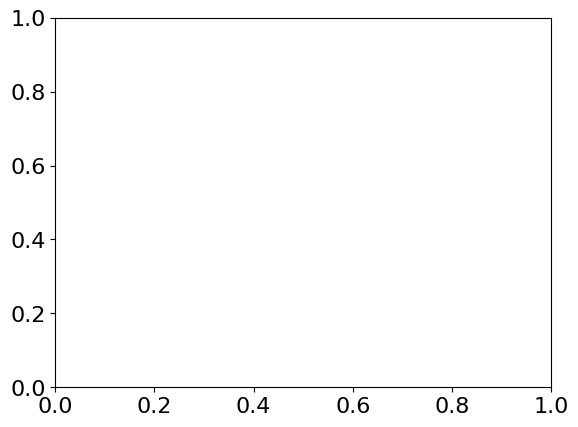

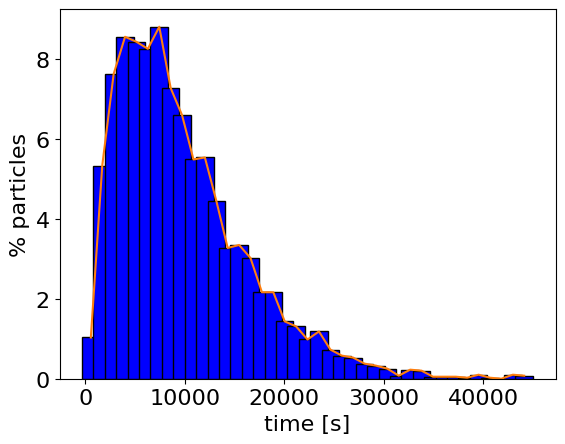

In [67]:
plt.show()

In [68]:
fig, ax = plt.subplots()

In [69]:
I0=sp.integrate.simpson(NP_hist,x,axis=0)
I1=sp.integrate.simpson(NP_hist*x,x,axis=0)
tau_num=I1/I0
NP_hist=NP_hist/I0
print (r'$\tau_{numeric}$%1.3f' %tau_num)

$\tau_{numeric}$9795.870


In [70]:
ax.plot(x/tau,NP_hist*tau, marker='*',color='g',label=scenario[3:])
ax.plot(teta, E_t*tau,label='Ideal')
ax.plot(teta,E_teta_2, label='Ideal-N=2')
ax.legend()
ax.set_xlabel(r'$ \theta $')
ax.set_ylabel(r'E( $ \theta $ )')
ax.title.set_text('RTD')

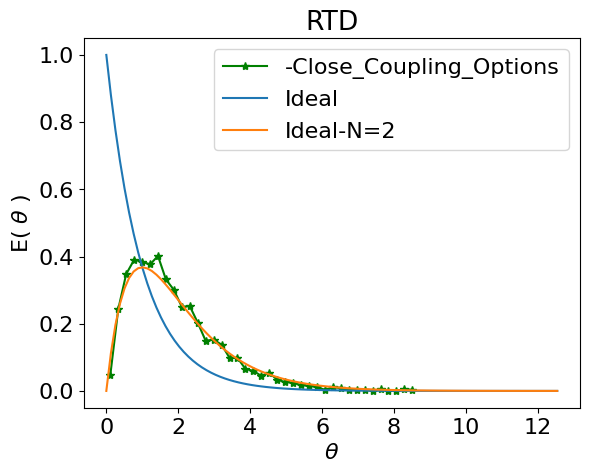

In [71]:
plt.show()

# Evaluation histogram for different zones #

In [72]:
fig, ax = plt.subplots(2,2, figsize=(14,10),sharey=True)
fig.tight_layout()

In [73]:
i=0;j=0
for head in heads[1:5]:
    print(head)
    print (i,j)
    histo[head]=pd.cut(data_frames[head], bins=bin[head])
    NP_hist=histo[head].value_counts(sort=False)
    NP=data_frames[head].count()
    coord=bin[head].to_numpy(dtype='float64')
    x=0.5 * (coord[:-1] + coord[1:])
    #print (coord[0],coord[1])
    wid=(coord[1]/2)
    print (wid)
    #ax.bar(x, Ploty, width = 1763, edgecolor='b')
    ax[i,j].bar(x, NP_hist/NP*100, width = 1.5*wid, edgecolor='k',color=col[head])
    #ax.hist(data_frames[heads[0]]*1, bins=bin_rtd, edgecolor='k')
    ax[i,j].plot(x,NP_hist/NP*100)
    ax[i,j].set_title(head)
    ax[i,j].text(0.65,0.8,'avg.=%2.f [s]'%data_frames[head].mean(),transform=ax[i,j].transAxes)
    ax[i,j].text(0.65,0.7,r'$\Delta t$=%2.f [s]'% (wid*2),transform=ax[i,j].transAxes)
    if i==0 :
        i +=1 
    elif j==0 and i==1 :
        i=0
        j=1
    

RT_Z11
0 0
243.07692307692307
RT_Z12 
1 0
160.51282051282053
RT_Z21
0 1
313.5897435897436
RT_Z22
1 1
210.64102564102564


In [74]:
ax[0,0].set_ylabel("% of Particles")
ax[1,0].set_ylabel("% of Particles")
ax[1,0].set_xlabel('time [s]')
ax[1,1].set_xlabel('time [s]');

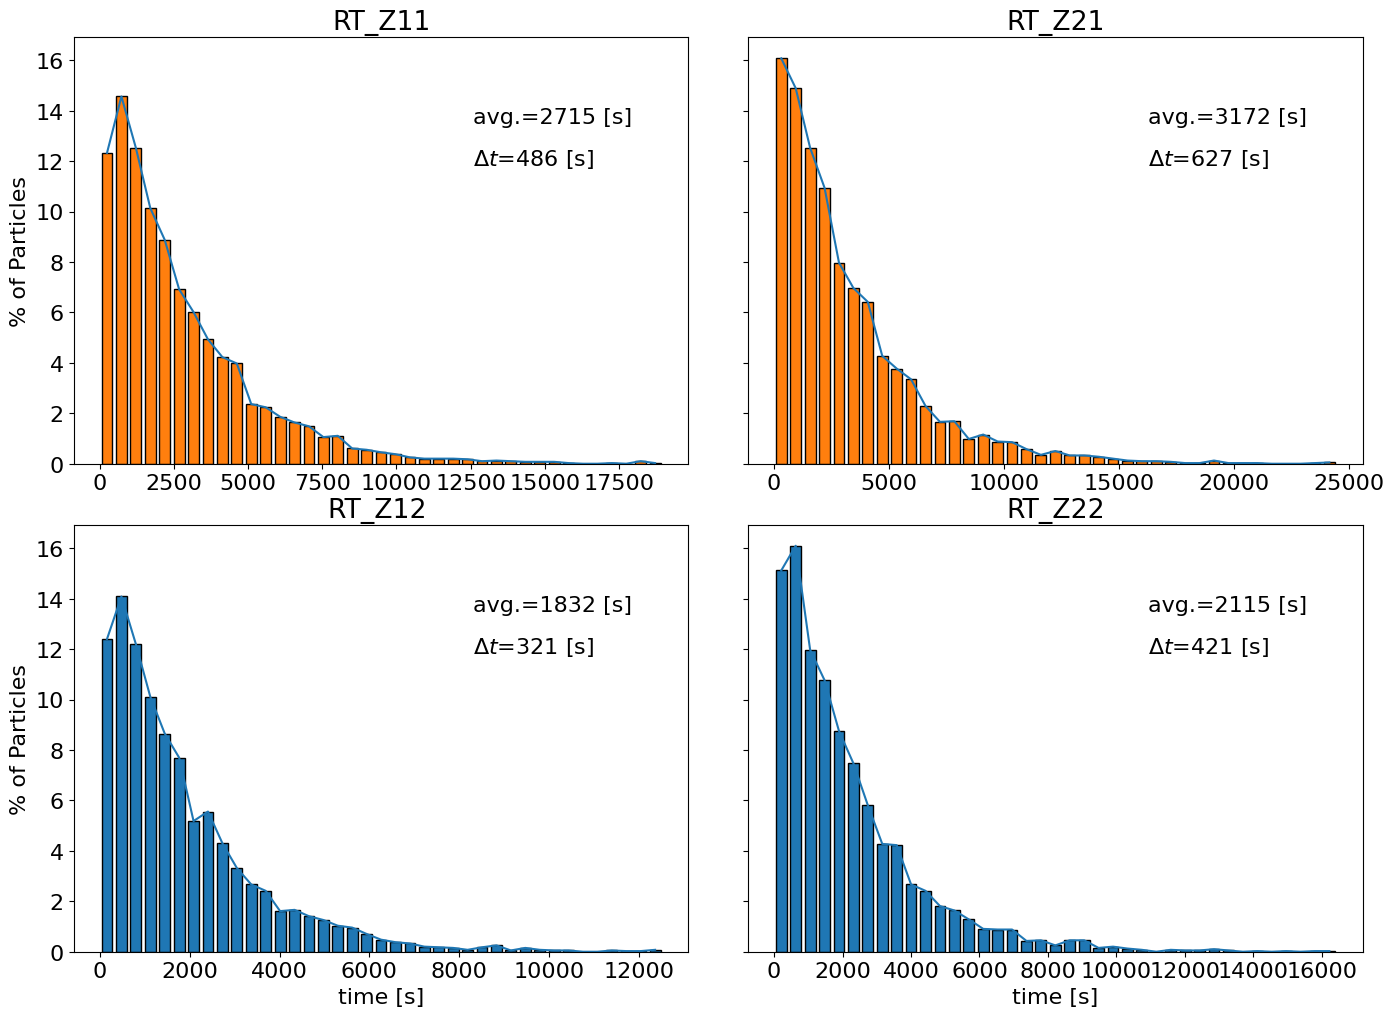

In [75]:
plt.show()